# Import libraries and read data

In [1]:
import pandas as pd
import numpy as np

import plotly
from plotly.offline import init_notebook_mode, iplot
import plotly.express as px

import plotly.graph_objects as go
from plotly.graph_objects import Bar

init_notebook_mode(connected=True)
plotly.offline.init_notebook_mode(connected=True)

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set()

/home/resaln/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [2]:
# time series data folder path
time_series_data_path = "COVID-19/csse_covid_19_data/csse_covid_19_time_series"

# global data
confirmed_global_path = f'{time_series_data_path}/time_series_covid19_confirmed_global.csv'
deaths_global_path = f'{time_series_data_path}/time_series_covid19_deaths_global.csv'
recovered_global_path = f'{time_series_data_path}/time_series_covid19_recovered_global.csv'

# U.S. data
confirmed_us_path = f'{time_series_data_path}/time_series_covid19_confirmed_US.csv'
deaths_us_path = f'{time_series_data_path}/time_series_covid19_deaths_US.csv'

In [3]:
# global data
confirmed_global_df = pd.read_csv(confirmed_global_path)
deaths_global_df = pd.read_csv(deaths_global_path)
recovered_global_df = pd.read_csv(recovered_global_path)

# U.S data
confirmed_us_df = pd.read_csv(confirmed_us_path)
deaths_us_df = pd.read_csv(deaths_us_path)

# Helper functions

In [4]:
def save_fig_as_div(fig_obj, file_name, fig_config=None):
    with open(f'charts/{file_name}', 'w') as fig_file:
        fig_div_string = plotly.offline.plot(figure_or_data=fig_obj, output_type='div',
                                             include_plotlyjs='cdn', auto_play=False,
                                             config=fig_config)
        fig_file.write(fig_div_string)

In [5]:
def get_n_color_palette(palette_name, n_colors, as_hex=False):
    palette = sns.color_palette(palette=palette_name, n_colors=n_colors)
    if as_hex:
        palette = palette.as_hex()
    palette.reverse()
    return palette

# Get to know the data:

## Globally confirmed cases:

In [6]:
confirmed_global_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,9216,9998,10582,11173,11831,12456,13036,13659,14525,15205
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,981,989,998,1004,1029,1050,1076,1099,1122,1137
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,7918,8113,8306,8503,8697,8857,8997,9134,9267,9394
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,762,762,762,763,763,763,763,764,764,764
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,60,61,69,70,70,71,74,81,84,86


In [7]:
confirmed_global_df.shape

(266, 135)

## Globally deaths:

In [8]:
deaths_global_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,205,216,218,219,220,227,235,246,249,257
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,31,31,32,32,33,33,33,33,33,33
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,582,592,600,609,617,623,630,638,646,653
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,51
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,3,4,4,4,4,4,4,4,4,4


In [9]:
deaths_global_df.shape

(266, 135)

## Globally recovered cases:

In [10]:
recovered_global_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,996,1040,1075,1097,1128,1138,1209,1259,1303,1328
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,777,783,789,795,803,812,823,851,857,872
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,4256,4426,4784,4747,4918,5129,5277,5422,5549,5748
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,652,653,653,663,676,676,681,684,692,694
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,17,18,18,18,18,18,18,18,18,18


In [11]:
recovered_global_df.shape

(253, 135)

## U.S. confirmed cases:

In [12]:
confirmed_us_df.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,165,165,166,166,167,170,171,172,172,172
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,22,22,22,22,22,22,22,22,22,22
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,3030,3100,3189,3260,3324,3397,3486,3647,3718,3776
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,69,69,69,69,69,69,69,69,69,69


In [13]:
confirmed_us_df.shape

(3261, 142)

## U.S. deaths:

In [14]:
deaths_us_df.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,5,5,5,5,5,5,5,5,5,5
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,2,2,2,2,2,2,2,2,2,2
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,126,127,127,129,129,129,131,132,133,136
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,6,6,6,6,6,6,6,6,6,6


In [15]:
deaths_us_df.shape

(3261, 143)

## Summary:

The three datasets share the same structure, and have the same fields, one for **confirmed** cases, one for **deaths** cases, and one for **recovered** cases.
Fields descriptioin
* Province/State: China - province name; US/Canada/Australia/ - city name, state/province name; Others - name of the event (e.g., "Diamond Princess" cruise ship); other countries - blank.
* Country/Region: country/region name conforming to WHO (will be updated).
* Lat and Long: a coordinates reference for the user.
* Date fields: M/DD/YYYY (UTC), the *cumulative* number of cases up until this date.

It can be seen that the `U.S.` dataset differs from the `global` one, as it has these additional columns: UID, iso2, iso3, code3, FIPS (we'll get to them later)

# Data Preprocessing:

In [16]:
# global data
print(f'Globally confirmed cases: {confirmed_global_df.shape}')
print(f'Globally deaths: {deaths_global_df.shape}')
print(f'Globally recovered cases: {recovered_global_df.shape}')

# U.S. data
print(f'U.S. Confirmed cases: {confirmed_us_df.shape}')
print(f'U.S. deaths: {deaths_us_df.shape}')

Globally confirmed cases: (266, 135)
Globally deaths: (266, 135)
Globally recovered cases: (253, 135)
U.S. Confirmed cases: (3261, 142)
U.S. deaths: (3261, 143)


although the three datasets have the same structure, they are inconsistent, the number of **recovered** cases is different, so I think we should drop it.

## 1 - Drop irrelevant columns:
`Lat` and `Long` columns specify the coordinates of the case, we won't be needing this inofrmation right now.

In [17]:
def drop_irrelevant_columns(df, irrelevant_columns):
    new_df = df.drop(columns=irrelevant_columns)
    return new_df

In [18]:
irrelevant_columns = ['Lat', 'Long']

In [19]:
confirmed_global_df = drop_irrelevant_columns(confirmed_global_df, irrelevant_columns)
deaths_global_df = drop_irrelevant_columns(deaths_global_df, irrelevant_columns)
recovered_global_df = drop_irrelevant_columns(recovered_global_df, irrelevant_columns)

In [20]:
confirmed_global_df.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,9216,9998,10582,11173,11831,12456,13036,13659,14525,15205
1,NaN,Albania,0,0,0,0,0,0,0,0,...,981,989,998,1004,1029,1050,1076,1099,1122,1137
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,7918,8113,8306,8503,8697,8857,8997,9134,9267,9394
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,762,762,762,763,763,763,763,764,764,764
4,NaN,Angola,0,0,0,0,0,0,0,0,...,60,61,69,70,70,71,74,81,84,86


In [21]:
deaths_global_df.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,205,216,218,219,220,227,235,246,249,257
1,NaN,Albania,0,0,0,0,0,0,0,0,...,31,31,32,32,33,33,33,33,33,33
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,582,592,600,609,617,623,630,638,646,653
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,51
4,NaN,Angola,0,0,0,0,0,0,0,0,...,3,4,4,4,4,4,4,4,4,4


In [22]:
recovered_global_df.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,996,1040,1075,1097,1128,1138,1209,1259,1303,1328
1,NaN,Albania,0,0,0,0,0,0,0,0,...,777,783,789,795,803,812,823,851,857,872
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,4256,4426,4784,4747,4918,5129,5277,5422,5549,5748
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,652,653,653,663,676,676,681,684,692,694
4,NaN,Angola,0,0,0,0,0,0,0,0,...,17,18,18,18,18,18,18,18,18,18


Also, drop columns `UID`, `iso2`, `iso3`, `code3`, `FIPS`, `Admin2`, `Combined_Key` from the `U.S.` data:

In [23]:
irrelevant_columns = ['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Lat', 'Long_', 'Combined_Key']

In [24]:
confirmed_us_df = drop_irrelevant_columns(confirmed_us_df, irrelevant_columns)
deaths_us_df = drop_irrelevant_columns(deaths_us_df, irrelevant_columns)

In [25]:
confirmed_us_df.head()

,Province_State,Country_Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20
0,American Samoa,US,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Guam,US,0,0,0,0,0,0,0,0,...,165,165,166,166,167,170,171,172,172,172
2,Northern Mariana Islands,US,0,0,0,0,0,0,0,0,...,22,22,22,22,22,22,22,22,22,22
3,Puerto Rico,US,0,0,0,0,0,0,0,0,...,3030,3100,3189,3260,3324,3397,3486,3647,3718,3776
4,Virgin Islands,US,0,0,0,0,0,0,0,0,...,69,69,69,69,69,69,69,69,69,69


In [26]:
deaths_us_df.head()

,Province_State,Country_Region,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20
0,American Samoa,US,55641,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Guam,US,164229,0,0,0,0,0,0,0,...,5,5,5,5,5,5,5,5,5,5
2,Northern Mariana Islands,US,55144,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
3,Puerto Rico,US,2933408,0,0,0,0,0,0,0,...,126,127,127,129,129,129,131,132,133,136
4,Virgin Islands,US,107268,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6


only deaths data has the column `Population`, but it should the same for the confirmed data also.

In [27]:
confirmed_us_df.insert(2, 'Population', deaths_us_df['Population'])

In [28]:
confirmed_us_df.head()

,Province_State,Country_Region,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20
0,American Samoa,US,55641,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Guam,US,164229,0,0,0,0,0,0,0,...,165,165,166,166,167,170,171,172,172,172
2,Northern Mariana Islands,US,55144,0,0,0,0,0,0,0,...,22,22,22,22,22,22,22,22,22,22
3,Puerto Rico,US,2933408,0,0,0,0,0,0,0,...,3030,3100,3189,3260,3324,3397,3486,3647,3718,3776
4,Virgin Islands,US,107268,0,0,0,0,0,0,0,...,69,69,69,69,69,69,69,69,69,69


## 2 - Normalize columns' names:
throughout this notebook, we will be quering columns `Province/State`, `Country/Region` a lot! so it would be better to rename them so some thing like `State` and `Country` respectively.

In [29]:
def rename_columns(df, columns_mapping):
    new_df = df.rename(columns=columns_mapping)
    return new_df

In [30]:
columns_mapping = {
    'Province/State': 'State',
    'Province_State': 'State',
    'Country/Region': 'Country',
    'Country_Region': 'Country'
}

In [31]:
# global data
confirmed_global_df = rename_columns(confirmed_global_df, columns_mapping)
deaths_global_df = rename_columns(deaths_global_df, columns_mapping)
recovered_global_df = rename_columns(recovered_global_df, columns_mapping)

# U.S. data
confirmed_us_df = rename_columns(confirmed_us_df, columns_mapping)
deaths_us_df = rename_columns(deaths_us_df, columns_mapping)

### Global data:

In [32]:
confirmed_global_df.head()

,State,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,9216,9998,10582,11173,11831,12456,13036,13659,14525,15205
1,NaN,Albania,0,0,0,0,0,0,0,0,...,981,989,998,1004,1029,1050,1076,1099,1122,1137
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,7918,8113,8306,8503,8697,8857,8997,9134,9267,9394
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,762,762,762,763,763,763,763,764,764,764
4,NaN,Angola,0,0,0,0,0,0,0,0,...,60,61,69,70,70,71,74,81,84,86


In [33]:
deaths_global_df.head()

,State,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,205,216,218,219,220,227,235,246,249,257
1,NaN,Albania,0,0,0,0,0,0,0,0,...,31,31,32,32,33,33,33,33,33,33
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,582,592,600,609,617,623,630,638,646,653
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,51
4,NaN,Angola,0,0,0,0,0,0,0,0,...,3,4,4,4,4,4,4,4,4,4


In [34]:
recovered_global_df.head()

,State,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,996,1040,1075,1097,1128,1138,1209,1259,1303,1328
1,NaN,Albania,0,0,0,0,0,0,0,0,...,777,783,789,795,803,812,823,851,857,872
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,4256,4426,4784,4747,4918,5129,5277,5422,5549,5748
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,652,653,653,663,676,676,681,684,692,694
4,NaN,Angola,0,0,0,0,0,0,0,0,...,17,18,18,18,18,18,18,18,18,18


### U.S. data:

In [35]:
confirmed_us_df.head()

,State,Country,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20
0,American Samoa,US,55641,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Guam,US,164229,0,0,0,0,0,0,0,...,165,165,166,166,167,170,171,172,172,172
2,Northern Mariana Islands,US,55144,0,0,0,0,0,0,0,...,22,22,22,22,22,22,22,22,22,22
3,Puerto Rico,US,2933408,0,0,0,0,0,0,0,...,3030,3100,3189,3260,3324,3397,3486,3647,3718,3776
4,Virgin Islands,US,107268,0,0,0,0,0,0,0,...,69,69,69,69,69,69,69,69,69,69


In [36]:
deaths_us_df.head()

,State,Country,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20
0,American Samoa,US,55641,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Guam,US,164229,0,0,0,0,0,0,0,...,5,5,5,5,5,5,5,5,5,5
2,Northern Mariana Islands,US,55144,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
3,Puerto Rico,US,2933408,0,0,0,0,0,0,0,...,126,127,127,129,129,129,131,132,133,136
4,Virgin Islands,US,107268,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6


## 3 - Drop `State` column from the global data:
most records of the global data doesn't have `State` value, so it's better to drop it.

In [37]:
confirmed_global_df = drop_irrelevant_columns(confirmed_global_df, 'State')
deaths_global_df = drop_irrelevant_columns(deaths_global_df, 'State')
recovered_global_df = drop_irrelevant_columns(recovered_global_df, 'State')

In [38]:
confirmed_global_df.head()

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,9216,9998,10582,11173,11831,12456,13036,13659,14525,15205
1,Albania,0,0,0,0,0,0,0,0,0,...,981,989,998,1004,1029,1050,1076,1099,1122,1137
2,Algeria,0,0,0,0,0,0,0,0,0,...,7918,8113,8306,8503,8697,8857,8997,9134,9267,9394
3,Andorra,0,0,0,0,0,0,0,0,0,...,762,762,762,763,763,763,763,764,764,764
4,Angola,0,0,0,0,0,0,0,0,0,...,60,61,69,70,70,71,74,81,84,86


In [39]:
deaths_global_df.head()

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,205,216,218,219,220,227,235,246,249,257
1,Albania,0,0,0,0,0,0,0,0,0,...,31,31,32,32,33,33,33,33,33,33
2,Algeria,0,0,0,0,0,0,0,0,0,...,582,592,600,609,617,623,630,638,646,653
3,Andorra,0,0,0,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,51
4,Angola,0,0,0,0,0,0,0,0,0,...,3,4,4,4,4,4,4,4,4,4


In [40]:
recovered_global_df.head()

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,996,1040,1075,1097,1128,1138,1209,1259,1303,1328
1,Albania,0,0,0,0,0,0,0,0,0,...,777,783,789,795,803,812,823,851,857,872
2,Algeria,0,0,0,0,0,0,0,0,0,...,4256,4426,4784,4747,4918,5129,5277,5422,5549,5748
3,Andorra,0,0,0,0,0,0,0,0,0,...,652,653,653,663,676,676,681,684,692,694
4,Angola,0,0,0,0,0,0,0,0,0,...,17,18,18,18,18,18,18,18,18,18


## 4 - Aggregate data:
aggregate the number of confirmed cases, number of deaths, and number of reovered cases at each day for each country.

aggregate global data:

In [41]:
def apply_aggregation(df, by_column):
    aggregate_df = df.groupby(by=by_column)\
                        .sum()\
                        .reset_index()
    return aggregate_df

In [42]:
by_column = 'Country'

In [43]:
# global
confirmed_global_agg_df = apply_aggregation(confirmed_global_df, by_column)
deaths_global_agg_df = apply_aggregation(deaths_global_df, by_column)
recovered_global_agg_df = apply_aggregation(recovered_global_df, by_column)

In [44]:
confirmed_global_agg_df.head()

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,9216,9998,10582,11173,11831,12456,13036,13659,14525,15205
1,Albania,0,0,0,0,0,0,0,0,0,...,981,989,998,1004,1029,1050,1076,1099,1122,1137
2,Algeria,0,0,0,0,0,0,0,0,0,...,7918,8113,8306,8503,8697,8857,8997,9134,9267,9394
3,Andorra,0,0,0,0,0,0,0,0,0,...,762,762,762,763,763,763,763,764,764,764
4,Angola,0,0,0,0,0,0,0,0,0,...,60,61,69,70,70,71,74,81,84,86


In [45]:
deaths_global_agg_df.head()

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,205,216,218,219,220,227,235,246,249,257
1,Albania,0,0,0,0,0,0,0,0,0,...,31,31,32,32,33,33,33,33,33,33
2,Algeria,0,0,0,0,0,0,0,0,0,...,582,592,600,609,617,623,630,638,646,653
3,Andorra,0,0,0,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,51
4,Angola,0,0,0,0,0,0,0,0,0,...,3,4,4,4,4,4,4,4,4,4


In [46]:
recovered_global_agg_df.head()

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,996,1040,1075,1097,1128,1138,1209,1259,1303,1328
1,Albania,0,0,0,0,0,0,0,0,0,...,777,783,789,795,803,812,823,851,857,872
2,Algeria,0,0,0,0,0,0,0,0,0,...,4256,4426,4784,4747,4918,5129,5277,5422,5549,5748
3,Andorra,0,0,0,0,0,0,0,0,0,...,652,653,653,663,676,676,681,684,692,694
4,Angola,0,0,0,0,0,0,0,0,0,...,17,18,18,18,18,18,18,18,18,18


aggregate U.S. data:

In [47]:
by_columns = ['Country', 'State']

In [48]:
confirmed_us_agg_df = apply_aggregation(confirmed_us_df, by_columns)
deaths_us_agg_df = apply_aggregation(deaths_us_df, by_columns)

In [49]:
confirmed_us_agg_df.head()

,Country,State,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20
0,US,Alabama,4903185,0,0,0,0,0,0,0,...,13670,14117,14478,14986,15650,16032,16530,17031,17359,17952
1,US,Alaska,1220488,0,0,0,0,0,0,0,...,403,407,407,408,410,411,424,429,433,459
2,US,American Samoa,55641,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,US,Arizona,7278717,0,0,0,0,1,1,1,...,15624,16053,16377,16575,16864,17318,17877,18472,19258,19936
4,US,Arkansas,3017804,0,0,0,0,0,0,0,...,5612,5775,5922,6029,6180,6277,6538,6777,7013,7253


In [50]:
deaths_us_agg_df.head()

,Country,State,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20
0,US,Alabama,4903185,0,0,0,0,0,0,0,...,541,549,551,566,580,583,591,610,618,630
1,US,Alaska,731545,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
2,US,American Samoa,55641,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,US,Arizona,7278717,0,0,0,0,0,0,0,...,775,801,801,807,810,834,860,886,904,907
4,US,Arkansas,3017804,0,0,0,0,0,0,0,...,113,115,116,117,119,120,125,132,133,133


## 5 - create `Population` dataframe for the `U.S.` data:

Later, we will convert the data to time series structure, and the value of `Population` shouldn't be in a time series data, as it doesn't change over time, it's rather a characteristic of the state.

In [51]:
us_population_df = confirmed_us_agg_df[['Country', 'State', 'Population']]

In [52]:
confirmed_us_agg_df = drop_irrelevant_columns(confirmed_us_agg_df, ['Population'])
deaths_us_agg_df = drop_irrelevant_columns(deaths_us_agg_df, ['Population'])

In [53]:
confirmed_us_agg_df.head()

,Country,State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20
0,US,Alabama,0,0,0,0,0,0,0,0,...,13670,14117,14478,14986,15650,16032,16530,17031,17359,17952
1,US,Alaska,0,0,0,0,0,0,0,0,...,403,407,407,408,410,411,424,429,433,459
2,US,American Samoa,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,US,Arizona,0,0,0,0,1,1,1,1,...,15624,16053,16377,16575,16864,17318,17877,18472,19258,19936
4,US,Arkansas,0,0,0,0,0,0,0,0,...,5612,5775,5922,6029,6180,6277,6538,6777,7013,7253


In [54]:
deaths_us_agg_df.head()

,Country,State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20
0,US,Alabama,0,0,0,0,0,0,0,0,...,541,549,551,566,580,583,591,610,618,630
1,US,Alaska,0,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
2,US,American Samoa,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,US,Arizona,0,0,0,0,0,0,0,0,...,775,801,801,807,810,834,860,886,904,907
4,US,Arkansas,0,0,0,0,0,0,0,0,...,113,115,116,117,119,120,125,132,133,133


## 5 - Restructe the Data:
convert the data into an easier structure, add column `date`, and change the columns to rows (for easier manipulation)

In [55]:
date_columns = confirmed_global_agg_df.filter(regex='\d{1,2}/\d{1,2}/\d{1,4}').columns.values

In [56]:
def construct_date_df(df, date_column_name, copy_columns, value_column_name):
    
    data = {}
    
    data['date'] = date_column_name
    
    for column in copy_columns:
        data[column] = df[column]
    
    data[value_column_name] = df[date_column_name]
    
    date_df = pd.DataFrame(data=data)
    
    return date_df

In [57]:
# global data
confirmed_global_date_frames = [construct_date_df(confirmed_global_agg_df, date_column, ['Country'], 'confirmed') for date_column in date_columns]
deaths_global_date_frames = [construct_date_df(deaths_global_agg_df, date_column, ['Country'], 'deaths') for date_column in date_columns]
recovered_global_date_frames = [construct_date_df(recovered_global_agg_df, date_column, ['Country'], 'recovered') for date_column in date_columns]

# U.S. data
confirmed_us_date_frames = [construct_date_df(confirmed_us_agg_df, date_column, ['Country', 'State'], 'confirmed') for date_column in date_columns]
deaths_us_date_frames = [construct_date_df(deaths_us_agg_df, date_column, ['Country', 'State'], 'deaths') for date_column in date_columns]

In [58]:
# global data
confirmed_global_time_series = pd.concat(confirmed_global_date_frames)
deaths_global_time_series = pd.concat(deaths_global_date_frames)
recovered_global_time_series = pd.concat(recovered_global_date_frames)

# U.S. data
confirmed_us_time_series = pd.concat(confirmed_us_date_frames)
deaths_us_time_series = pd.concat(deaths_us_date_frames)

## 6 - Convert `date` column:

In [59]:
def convert_col_to_datetime(df, col_name):
    
    df[col_name] = pd.to_datetime(df[col_name], utc=False)
    
    df[col_name] = df[col_name].dt.strftime("%Y-%m-%d")
    
    df.sort_values(by='date', inplace=True)
    
    return df

In [60]:
# global data
confirmed_global_time_series = convert_col_to_datetime(confirmed_global_time_series, 'date')
deaths_global_time_series = convert_col_to_datetime(deaths_global_time_series, 'date')
recovered_global_time_series = convert_col_to_datetime(recovered_global_time_series, 'date')

# U.S. data
confirmed_us_time_series = convert_col_to_datetime(confirmed_us_time_series, 'date')
deaths_us_time_series = convert_col_to_datetime(deaths_us_time_series, 'date')

In [61]:
confirmed_global_time_series.head()

,date,Country,confirmed
0,2020-01-22,Afghanistan,0
120,2020-01-22,Namibia,0
121,2020-01-22,Nepal,0
122,2020-01-22,Netherlands,0
123,2020-01-22,New Zealand,0


In [62]:
deaths_global_time_series.head()

,date,Country,deaths
0,2020-01-22,Afghanistan,0
120,2020-01-22,Namibia,0
121,2020-01-22,Nepal,0
122,2020-01-22,Netherlands,0
123,2020-01-22,New Zealand,0


In [63]:
recovered_global_time_series.head()

,date,Country,recovered
0,2020-01-22,Afghanistan,0
120,2020-01-22,Namibia,0
121,2020-01-22,Nepal,0
122,2020-01-22,Netherlands,0
123,2020-01-22,New Zealand,0


In [64]:
confirmed_us_time_series.head()

,date,Country,State,confirmed
0,2020-01-22,US,Alabama,0
31,2020-01-22,US,Nebraska,0
32,2020-01-22,US,Nevada,0
33,2020-01-22,US,New Hampshire,0
34,2020-01-22,US,New Jersey,0


In [65]:
deaths_us_time_series.head()

,date,Country,State,deaths
0,2020-01-22,US,Alabama,0
31,2020-01-22,US,Nebraska,0
32,2020-01-22,US,Nevada,0
33,2020-01-22,US,New Hampshire,0
34,2020-01-22,US,New Jersey,0


in the rest of the notebook, we will focus on the following five dataframes:
- `confirmed_global_time_series`: time series of the global confirmed cases.
- `deaths_global_time_series`: time series of the global deaths.
- `recovered_global_time_series`: time series of the global recovered cases.
- `confirmed_us_time_series`: time series of U.S. confirmed cases.
- `deaths_us_time_series`: time series of U.S. deaths.

A *time series* data shows the change in a *statiscal variable* according to *time*.


Each row in the previous time series is a tuple of date, country, and measure, the measure represents the cumulative sum in the country, up until the date.

## 7 - Focus on *Outbreaks*:
We will focus in this notebook only on countries with high **death tolls**, countires that are nearly affected by the pandemic will be discarded.

In [66]:
last_day = deaths_global_time_series['date'].values[-1]

In [67]:
most_affected_10_countries = deaths_global_time_series[deaths_global_time_series['date'] == last_day]\
                                                        .sort_values(by='deaths', ascending=False)\
                                                        [:10]

In [68]:
most_affected_20_countries = deaths_global_time_series[deaths_global_time_series['date'] == last_day]\
                                                        .sort_values(by='deaths', ascending=False)\
                                                        [:20]

In [69]:
most_affected_10_countries

,date,Country,deaths
174,2020-05-31,US,104381
178,2020-05-31,United Kingdom,38571
85,2020-05-31,Italy,33415
23,2020-05-31,Brazil,29314
62,2020-05-31,France,28805
158,2020-05-31,Spain,27127
113,2020-05-31,Mexico,9930
16,2020-05-31,Belgium,9467
66,2020-05-31,Germany,8540
81,2020-05-31,Iran,7797


In [70]:
most_affected_10_countries_names = most_affected_10_countries['Country'].values

In [114]:
most_affected_20_countries_names = most_affected_20_countries['Country'].values

Create time series for most affected countries:

In [71]:
most_10_deaths_time_series = deaths_global_time_series[deaths_global_time_series['Country']\
                                                       .isin(most_affected_10_countries_names)]

In [72]:
most_10_deaths_time_series.head()

,date,Country,deaths
113,2020-01-22,Mexico,0
174,2020-01-22,US,0
178,2020-01-22,United Kingdom,0
158,2020-01-22,Spain,0
23,2020-01-22,Brazil,0


In [116]:
most_20_deaths_time_series = deaths_global_time_series[deaths_global_time_series['Country']\
                                                       .isin(most_affected_20_countries_names)]

In [117]:
most_20_deaths_time_series.head()

,date,Country,deaths
122,2020-01-22,Netherlands,0
134,2020-01-22,Peru,0
113,2020-01-22,Mexico,0
173,2020-01-22,Turkey,0
174,2020-01-22,US,0


In [73]:
most_10_confirmed_time_series = confirmed_global_time_series[confirmed_global_time_series['Country']\
                                                             .isin(most_affected_10_countries_names)]

In [74]:
most_10_confirmed_time_series.head()

,date,Country,confirmed
113,2020-01-22,Mexico,0
174,2020-01-22,US,1
178,2020-01-22,United Kingdom,0
158,2020-01-22,Spain,0
23,2020-01-22,Brazil,0


In [75]:
most_10_recovered_time_series = recovered_global_time_series[recovered_global_time_series['Country']\
                                                             .isin(most_affected_10_countries_names)]

In [76]:
most_10_recovered_time_series.head()

,date,Country,recovered
113,2020-01-22,Mexico,0
174,2020-01-22,US,0
178,2020-01-22,United Kingdom,0
158,2020-01-22,Spain,0
23,2020-01-22,Brazil,0


# Data Visualization:

## First infection date

In [77]:
most_10_confirmed_time_series.head()

,date,Country,confirmed
113,2020-01-22,Mexico,0
174,2020-01-22,US,1
178,2020-01-22,United Kingdom,0
158,2020-01-22,Spain,0
23,2020-01-22,Brazil,0


In [78]:
first_infection_date_df = most_10_confirmed_time_series[most_10_confirmed_time_series['confirmed'] > 0]\
                                                        .groupby('Country')\
                                                        .first()\
                                                        .reset_index()\
                                                        .sort_values(by='date')

In [79]:
first_infection_date_df

,Country,date,confirmed
8,US,2020-01-22,1
2,France,2020-01-24,2
3,Germany,2020-01-27,1
5,Italy,2020-01-31,2
9,United Kingdom,2020-01-31,2
7,Spain,2020-02-01,1
0,Belgium,2020-02-04,1
4,Iran,2020-02-19,2
1,Brazil,2020-02-26,1
6,Mexico,2020-02-28,1


In [80]:
table = go.Table(
    header=dict(values=first_infection_date_df.columns.to_list(),
               fill_color='rgba(0, 0, 0, 0)',
               align='left'),
    cells=dict(values=[first_infection_date_df.Country, first_infection_date_df.date,
                      first_infection_date_df.confirmed],
              fill_color='rgba(0, 0, 0, 0)',
              align='left')
)

In [81]:
fig = go.Figure(data=[table])

fig.update_layout(autosize=False,
                  width=800, height=600,
                  title_text='<i><b>First infection date</b></i>',
                  plot_bgcolor='rgba(0, 0, 0, 0)',
                  paper_bgcolor= 'rgba(0, 0, 0, 0)',
                  font={
                      'family': "Courier New, monospace",
                      'size': 14,
                      'color': "white"
                  }
                 )

fig.show()

In [82]:
# save_fig_as_div(fig_obj=fig, file_name="first_infection_date_table.html")

In [83]:
first_infection_date_df.style.set_properties(**{'background-color': 'white',
                           'color': 'black',
                           'border-color': 'white',
                           'border-width': '350px'})\
                        .hide_index()

Country,date,confirmed
US,2020-01-22,1
France,2020-01-24,2
Germany,2020-01-27,1
Italy,2020-01-31,2
United Kingdom,2020-01-31,2
Spain,2020-02-01,1
Belgium,2020-02-04,1
Iran,2020-02-19,2
Brazil,2020-02-26,1
Mexico,2020-02-28,1


In [84]:
html_string = first_infection_date_df.style.set_properties(**{'background-color': 'white',
                           'color': 'black',
                           'border-color': 'white',
                           'border-width': '350px'})\
                        .hide_index()\
                        .render()

In [85]:
with open('charts/first_infection_date_table.html', 'w') as html_file:
    html_file.write(html_string)

## First death date

In [86]:
most_10_deaths_time_series.head()

,date,Country,deaths
113,2020-01-22,Mexico,0
174,2020-01-22,US,0
178,2020-01-22,United Kingdom,0
158,2020-01-22,Spain,0
23,2020-01-22,Brazil,0


In [87]:
first_death_date_df = most_10_deaths_time_series[most_10_deaths_time_series['deaths'] > 0]\
                                                .groupby(by='Country')\
                                                .first()\
                                                .reset_index()\
                                                .sort_values(by='date')

In [88]:
first_death_date_df

,Country,date,deaths
2,France,2020-02-15,1
4,Iran,2020-02-19,2
5,Italy,2020-02-21,1
8,US,2020-02-29,1
7,Spain,2020-03-03,1
9,United Kingdom,2020-03-06,1
3,Germany,2020-03-09,2
0,Belgium,2020-03-11,3
1,Brazil,2020-03-17,1
6,Mexico,2020-03-19,1


In [89]:
first_death_date_df.style.set_properties(**{'background-color': 'white',
                           'color': 'black',
                           'border-color': 'white',
                           'border-width': '350px'})\
                        .hide_index()

Country,date,deaths
France,2020-02-15,1
Iran,2020-02-19,2
Italy,2020-02-21,1
US,2020-02-29,1
Spain,2020-03-03,1
United Kingdom,2020-03-06,1
Germany,2020-03-09,2
Belgium,2020-03-11,3
Brazil,2020-03-17,1
Mexico,2020-03-19,1


In [90]:
html_string = first_death_date_df.style.set_properties(**{'background-color': 'white',
                           'color': 'black',
                           'border-color': 'white',
                           'border-width': '350px'})\
                        .hide_index()\
                        .render()

In [91]:
with open('charts/first_death_date_table.html', 'w') as html_file:
    html_file.write(html_string)

## Line Chart:

### Deaths trajectory

In [92]:
fig = px.line(data_frame=most_10_deaths_time_series, x='date', y='deaths', color='Country',
              line_group='Country')

fig.update_layout(autosize=False,
                  width=1000, height=600,
                  title_text='<i><b>Deaths trajectory</b></i>',
                  xaxis_title="Date", yaxis_title="Number of deaths",
                  plot_bgcolor='rgba(0, 0, 0, 0)',
                  paper_bgcolor= 'rgba(0, 0, 0, 0)',
                  font={
                      'family': "Courier New, monospace",
                      'size': 14,
                      'color': "#eaeaea"
                  }
                 )

fig.show()

In [93]:
save_fig_as_div(fig_obj=fig, file_name="deaths_trajectory_line_chart.html")

### Infections trajectory

In [94]:
fig = px.line(data_frame=most_10_confirmed_time_series, x='date', y='confirmed', color='Country',
              line_group='Country')

fig.update_layout(autosize=False,
                  width=1000, height=600,
                  title_text='<i><b>Infections trajectory</b></i>',
                  xaxis_title="Date", yaxis_title="Number of infections",
                  plot_bgcolor='rgba(0, 0, 0, 0)',
                  paper_bgcolor= 'rgba(0, 0, 0, 0)',
                  font={
                      'family': "Courier New, monospace",
                      'size': 14,
                      'color': "#eaeaea"
                  }
                 )

fig.show()

In [95]:
save_fig_as_div(fig_obj=fig, file_name="infections_trajectory_line_chart.html")

### Recovery trajectory:

In [96]:
fig = px.line(data_frame=most_10_recovered_time_series, x='date', y='recovered', color='Country',
              line_group='Country')

fig.update_layout(autosize=False,
                  width=1000, height=600,
                  title_text='<i><b>Recovery trajectory</b></i>',
                  xaxis_title="Date", yaxis_title="Number of recovered cases",
                  plot_bgcolor='rgba(0, 0, 0, 0)',
                  paper_bgcolor= 'rgba(0, 0, 0, 0)',
                  font={
                      'family': "Courier New, monospace",
                      'size': 14,
                      'color': "#eaeaea"
                  }
                 )

fig.show()

In [97]:
save_fig_as_div(fig_obj=fig, file_name="recovery_trajectory_line_chart.html")

## Global Choropleth Map:

In [98]:
fig = px.choropleth(data_frame=deaths_global_time_series, locations='Country',
                    locationmode='country names', color='deaths',
                    hover_name='deaths',
                    animation_frame=deaths_global_time_series.date,
                    color_continuous_scale='Reds')

# update figure layout
fig.update_layout(autosize=False,
                  width=1000, height=600,
                  title_text='<i><b>Deaths over time</b></i>',
                  xaxis_title="Measures", yaxis_title="Class",
                  plot_bgcolor='rgba(0, 0, 0, 0)',
                  paper_bgcolor= 'rgba(0, 0, 0, 0)',
                  font={
                      'family': "Courier New, monospace",
                      'size': 14,
                      'color': "#eaeaea"
                  }
                 )

# disable mouse scroll zoom
fig.show(config={
    'scrollZoom': False
})

In [99]:
save_fig_as_div(fig_obj=fig, file_name="global_deaths_choropleth_map.html", fig_config={
    'scrollZoom': False
})

## U.S. Choropleth:

In [100]:
# dataset that contains U.S. states codes
# Plotly only accept U.S. states as codes
us_states_codes_df = pd.read_csv('other-data/us-states-codes.csv')

In [101]:
us_states_codes_df.head()

,State,Abbrev,Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


In [102]:
# join U.S. deaths dataset with U.S. codes dataset on `State` name
temp_df = deaths_us_time_series.merge(right=us_states_codes_df,
                                      left_on='State',
                                      right_on='State',
                                      how='left')

In [103]:
fig = px.choropleth(data_frame=temp_df,
                    locations='Code',
                    locationmode="USA-states",
                    color='deaths',
                    animation_frame=temp_df.date,
                    scope="usa",
                    color_continuous_scale='Reds', hover_data=['State'])

# update figure layout
fig.update_layout(autosize=False,
                  width=1000, height=600,
                  title_text='<i><b>U.S. Deaths over time</b></i>',
                  plot_bgcolor='rgba(0, 0, 0, 0)',
                  paper_bgcolor= 'rgba(0, 0, 0, 0)',
                  font={
                      'family': "Courier New, monospace",
                      'size': 14,
                      'color': "#eaeaea"
                  }
                 )

# disable mouse scroll zoom
fig.show(config={
    'scrollZoom': False
})

In [104]:
save_fig_as_div(fig_obj=fig, file_name="us_deaths_choropleth_map.html", fig_config={
    'scrollZoom': False
})

## Daily deaths

In [105]:
def get_daily_deaths(deaths_columns):
    '''
    this function calculates the daily deaths from the time series of accumulated deaths
    it takes the accumulated deaths array, and returns the original array which corresponds to deaths at each day
    '''
    number_of_days = len(deaths_columns)
    daily_deaths = deaths_columns[0]
    # to calculate the original array subtract deaths[0..yesterday] from deaths[1..today]
    diff = np.absolute(deaths_columns[1:number_of_days] - deaths_columns[0:number_of_days - 1])
    daily_deaths = np.append(daily_deaths, diff)
    return daily_deaths

In [106]:
def get_daily_deaths_df(df, country_name):
    '''
    this function constructs a new Series called `daily deaths` for the passed dataframe
    the `daily deaths` Series represents the daily deaths values at each day
    '''
    new_df = df[df['Country'] == country_name]
    country_daily_deaths = get_daily_deaths(new_df['deaths'].values)
    
    # add new column for daily deaths
    new_df = new_df.assign(daily_deaths=country_daily_deaths)
    return new_df

Add daily deaths column for most affected countries:

In [129]:
countries_daily_deaths = pd.concat([get_daily_deaths_df(most_10_deaths_time_series, country_name)
                                    for country_name in most_affected_10_countries_names])

In [130]:
countries_daily_deaths.head()

,date,Country,deaths,daily_deaths
174,2020-01-22,US,0,0
174,2020-01-23,US,0,0
174,2020-01-24,US,0,0
174,2020-01-25,US,0,0
174,2020-01-26,US,0,0


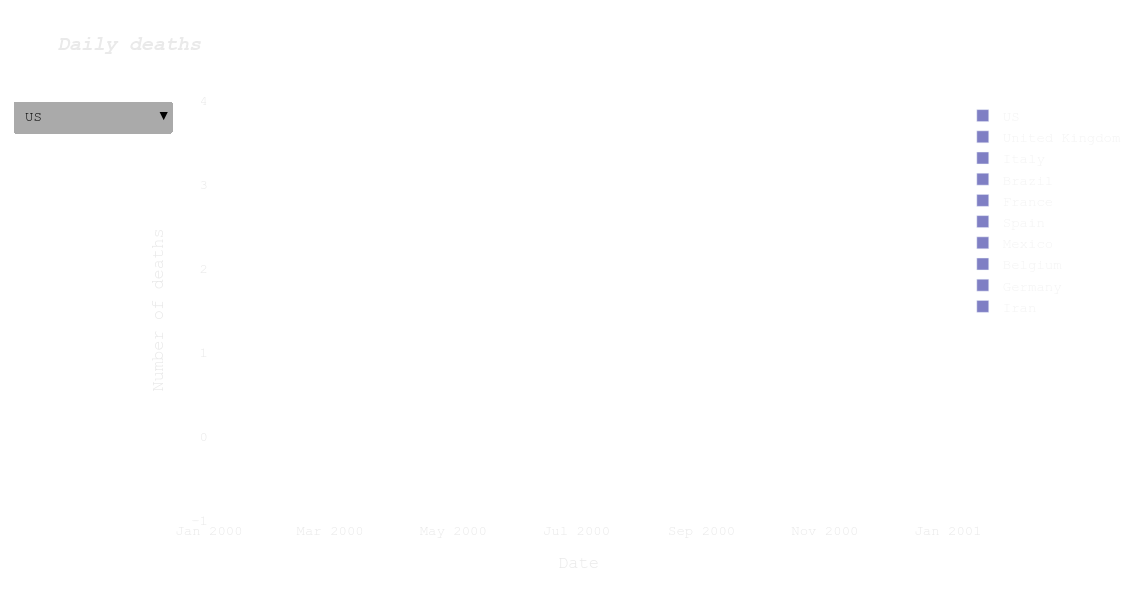

In [131]:
# create figure object
fig = go.Figure()

# list of drop-down menu buttons
buttons_list = []

# number of countries
number_of_countries = len(countries_daily_deaths.Country.unique())

# add bar chart for each country
for idx, country_name in enumerate(countries_daily_deaths.Country.unique()):
    
    # get country daily deaths
    country_daily_deaths_df = countries_daily_deaths[countries_daily_deaths.Country == country_name]
    
    # add bar chart for the figure
    fig.add_trace(
        go.Bar(x=country_daily_deaths_df.date,
               y=country_daily_deaths_df.daily_deaths,
               name=country_name,
               marker_color='darkblue',
               visible="legendonly"
              )
    )
    
    button_visibility_settings = [False] * number_of_countries
    button_visibility_settings[idx] = True
    
    button = dict(label=country_name,
                  method='update',
                  args=[
                      {'visible': button_visibility_settings},
                      {'title': country_name, 'showlegend': True}
                  ]
                 )
    # add corresponding drop-down button for this chart
    buttons_list.append(button)

# update figure layout to set menu settings
fig.update_layout(
    updatemenus=[
        go.layout.Updatemenu(
            active=0,
            bgcolor='#AAAAAA',
            bordercolor='#FFFFFF',
            font=dict(size=14,
                      color='#000000',
                      family="Courier New, monospace"),
            buttons=buttons_list,
            showactive=True
        )
    ],
    autosize=False,
    width=1000, height=600,
    title_text='<i><b>Daily deaths</b></i>',
    xaxis_title="Date", yaxis_title="Number of deaths",
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor= 'rgba(0, 0, 0, 0)',
    font={
        'family': "Courier New, monospace",
        'size': 14,
        'color': "#eaeaea"
    }
)

fig.show()

In [132]:
save_fig_as_div(fig_obj=fig, file_name="most_affected_countries_daily_deaths_bar_chart.html")